# 加载和规范化数据集

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "learn2data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="learn2data",
    train=False,
    download=True,
    transform=ToTensor()
)


In [5]:
print(type(test_data))

<class 'torchvision.datasets.mnist.FashionMNIST'>


本视频内容非微软官方制作，不代表微软官方观点。——2024年注

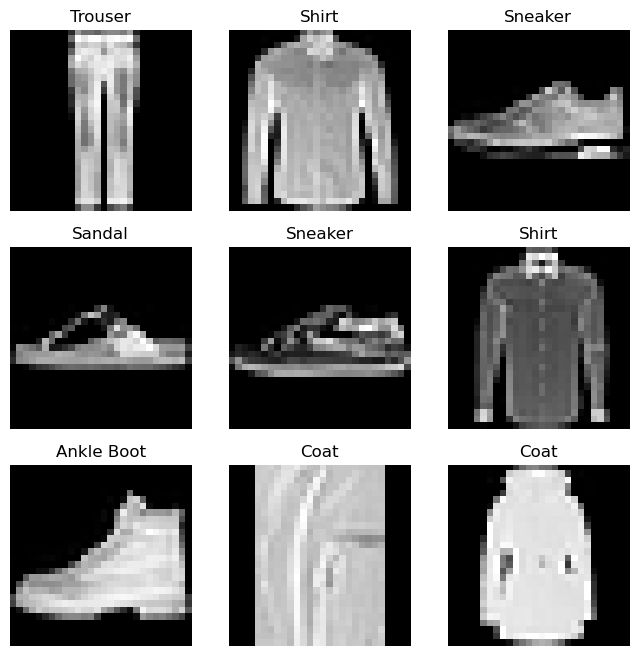

In [3]:
import random
lables_map = {
    0:"T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = random.randint(0, len(training_data))
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(lables_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


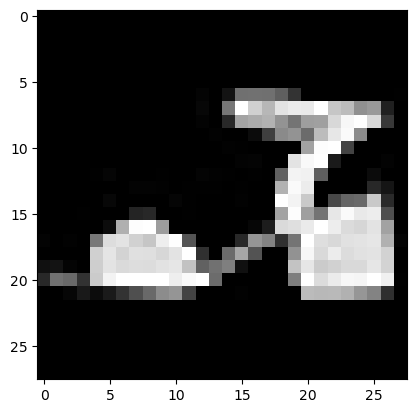

Label:Sandal


In [5]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap = "gray")
plt.show()
label_name = lables_map[label.item()]
print(f"Label:{label_name}")

In [6]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "learn2data",
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value = 1))
)

In [22]:
src = torch.arange(1, 11, 1, dtype=torch.int32).reshape(2,5)

In [17]:
src

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [25]:
index = [[0,1,2,0,0],[2,1,0,1,2]]

In [26]:
out = torch.zeros((3,5), dtype=torch.int32)
out.scatter_(0, torch.tensor(index), src)
print(out)

tensor([[ 1,  0,  8,  4,  5],
        [ 0,  7,  0,  9,  0],
        [ 6,  0,  3,  0, 10]], dtype=torch.int32)


In [30]:
cont = torch.zeros(10, dtype=torch.int32)
cont.scatter(0, torch.tensor(6), 1)

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=torch.int32)

In [3]:
# 练习scatter
import torch
source = torch.randint(10,20,(3,5))
indexs = torch.tensor([[2,1,0,1,2],[1,0,2,2,0],[0,2,1,0,1]])
indexs_1 = torch.tensor([[1,0,2,4,3],[4,0,1,3,2],[2,3,1,4,0]])
result = torch.zeros_like(source).scatter(0, indexs, source)
result_1 = torch.zeros_like(source).scatter(1, indexs_1, source)

print(f"{source}\n{indexs}\n{result}\n{indexs_1}\n{result_1}")


tensor([[10, 19, 14, 16, 11],
        [18, 14, 12, 13, 18],
        [13, 10, 14, 12, 18]])
tensor([[2, 1, 0, 1, 2],
        [1, 0, 2, 2, 0],
        [0, 2, 1, 0, 1]])
tensor([[13, 14, 14, 12, 18],
        [18, 19, 14, 16, 18],
        [10, 10, 12, 13, 11]])
tensor([[1, 0, 2, 4, 3],
        [4, 0, 1, 3, 2],
        [2, 3, 1, 4, 0]])
tensor([[19, 10, 14, 11, 16],
        [14, 12, 18, 13, 18],
        [18, 14, 13, 10, 12]])
